In [20]:
import os
import struct
import numpy as np
 
path = "C:/Users/Crist/ComputerVision/Dataset/"    

# Dataset addestramento: 60k immagini, 60k etichette
# Dataset test: 10k immagini, 10k etichette


def load_mnist(path, kind='train'):
    """Load MNIST data from 'path'"""
    
    labels_path = os.path.join(path, 
                               '%s-labels-idx1-ubyte' % kind)
    images_path = os.path.join(path, 
                               '%s-images-idx3-ubyte' % kind)
    
    # apro il file dal percorso labels_path in modalità lettura  
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', 
                                 lbpath.read(8))
        # creo il vettore labels leggendo dal file lbpath
        labels = np.fromfile(lbpath, 
                             dtype=np.uint8)

    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII", 
                                               imgpath.read(16))
        images = np.fromfile(imgpath, 
                             dtype=np.uint8).reshape(len(labels), 784)
        images = ((images / 255.) - .5) * 2
 
    return images, labels

# images: array NumPy di dimensione n * 784 (addestramento --> n = 60000 , test --> n = 10000)
# labels: array NumPy di dimensione n (contiene l'etichetta della cifra 0,1,2,...,9)

# magic: descrizione del protocollo del file 


In [ ]:
X_train, y_train = load_mnist(path, kind='train')
print('Rows: %d, columns: %d' % (X_train.shape[0], X_train.shape[1]))
m , n = X_train.shape

In [ ]:
X_test, y_test = load_mnist(path, kind='t10k')

print('Rows: %d, columns: %d' % (X_test.shape[0], X_test.shape[1]))

In [ ]:
# visualizziamo le prime cifre delle 10 classi 
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('./figures/mnist_all.png', dpi=300)
plt.show()

In [ ]:
# visualizziamo le prime 25 varianti della cifra '7'
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(25):
    img = X_train[y_train == 7][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('./figures/mnist_7.png', dpi=300)
plt.show()

In [ ]:
X_train, y_train = load_mnist(path, kind='train')
print('Rows: %d, columns: %d' % (X_train.shape[0], X_train.shape[1]))
m , n = X_train.shape
X_train = X_train.T
y_train = y_train.T

def xavier_init(shape):
    # Calcola la varianza desiderata
    var = 2.0 / (shape[0] + shape[1])
    # Inizializza i pesi utilizzando una distribuzione normale con media 0 e deviazione standard sqrt(var)
    return np.random.randn(*shape) * np.sqrt(var)

def init_params():
    W1 = xavier_init((10,784))
    W2 = xavier_init((10,10))
    b1 = xavier_init((10,1))
    b2 = xavier_init((10,1))
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)


def softmax(Z):
    exp_Z = np.exp(Z - np.max(Z, axis=1, keepdims=True))
    A = exp_Z / np.sum(exp_Z, axis=1, keepdims=True)
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] 
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        print('ciao')
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2
W1, b1, W2, b2 = gradient_descent(X_train, y_train, 0.01, 500)

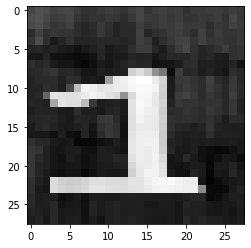

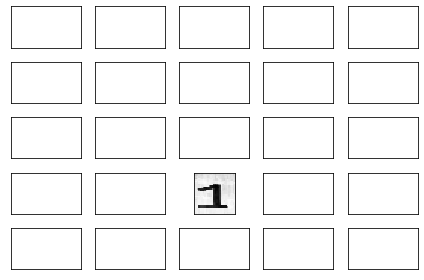

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1]


In [121]:
import numpy as np
DATASET_PATH = "C:/Users/Crist/ComputerVision/Dataset/binary_mnist/binary_mnist.csv"
dataset = np.loadtxt(open(DATASET_PATH, "rb"), delimiter=",")

# Prepariamo i Dati
X = dataset[:,:-1]
y = dataset[:,-1:]
y = y.ravel()
X = ((X / 255.) - .5) * 2
y = y.astype(np.int32)
X_nera = X[41, :]
y_nera = y[41]
X_nera = X_nera.T
y_nera = y_nera.T

X_nera = X_nera.reshape((28, 28)) * 255
plt.gray()
plt.imshow(X_nera, interpolation='nearest')
plt.show()

# visualizziamo le prime cifre delle 10 classi 
import matplotlib.pyplot as plt
# visualizziamo le prime 25 varianti della cifra '7'
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()

img = X[y == 1][17].reshape(28, 28)
ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('./figures/mnist_7.png', dpi=300)
plt.show()

X_convalida = X.T
y_convalida = y.T

print(y_convalida)




In [116]:
from sklearn.utils import shuffle
X_train, y_train = load_mnist(path, kind='train')
print('Rows: %d, columns: %d' % (X_train.shape[0], X_train.shape[1]))
m , n = X_train.shape

X_test, y_test = load_mnist(path, kind='t10k')
print('Rows: %d, columns: %d' % (X_test.shape[0], X_test.shape[1]))

X_train = X_train.T
y_train = y_train.T
X_test = X_test.T
y_test = y_test.T



X_test1 = X_test[:, 0:1000]
y_test1 = y_test[0:1000]
X_test2 = X_test[:, 1000:2000]
y_test2 = y_test[1000:2000]

def xavier_init(shape):
    # Calcola la varianza desiderata
    var = 1.0 / (shape[0] + shape[1])
    # Inizializza i pesi utilizzando una distribuzione normale con media 0 e deviazione standard sqrt(var)
    return np.random.randn(*shape) * np.sqrt(var)

def init_params():
    W1 = xavier_init((10,784))
    W2 = xavier_init((10,10))
    b1 = xavier_init((10,1))
    b2 = xavier_init((10,1))
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

W1, b1, W2, b2 = gradient_descent(X_train, y_train, 0.01, 500)

Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X_nera)
print(A2.shape)
prediction_test = get_predictions(A2)
print("Accuratezza test: %d", (get_accuracy(prediction_test, y_nera)))




Rows: 60000, columns: 784
Rows: 10000, columns: 784
Iteration:  0
[9 9 9 ... 9 9 9] [5 0 4 ... 5 6 8]
0.0994
Iteration:  10
[5 1 1 ... 6 9 6] [5 0 4 ... 5 6 8]
0.09998333333333333
Iteration:  20
[5 1 9 ... 6 9 6] [5 0 4 ... 5 6 8]
0.13103333333333333
Iteration:  30
[9 1 9 ... 6 6 6] [5 0 4 ... 5 6 8]
0.15543333333333334
Iteration:  40
[9 1 1 ... 6 6 6] [5 0 4 ... 5 6 8]
0.19563333333333333
Iteration:  50
[9 0 1 ... 6 6 6] [5 0 4 ... 5 6 8]
0.24201666666666666
Iteration:  60
[9 0 1 ... 6 6 6] [5 0 4 ... 5 6 8]
0.2810166666666667
Iteration:  70
[9 0 6 ... 9 6 6] [5 0 4 ... 5 6 8]
0.31185
Iteration:  80
[9 0 6 ... 9 6 6] [5 0 4 ... 5 6 8]
0.33936666666666665


KeyboardInterrupt: 